In [67]:
import pandas as pd
import numpy as np
from random import randint
from random import random
df = pd.read_csv("../genres_v2.csv")
df.drop(columns=["uri","track_href", "title", "analysis_url", "id","Unnamed: 0"],inplace=True,axis=1)

# Create Inconsistent Data
df["duration_ms"] = [-x if randint(0,10) == 3 else x for x in df["duration_ms"].values]
df["loudness"] = [randint(70, 120) if randint(0,100) == 42 else x for x in df["loudness"].values]
df["key"] = [x+random() for x in df["key"].values]

# Create Dictionary with column name, type, and real type.
fields = {"Fields":[str(x) for x in df.columns], "Types":[str(df[x].dtype) for x in df.columns],
         "Real Type": ["int64" if x == "key" else str(df[x].dtype) for x in df.columns]}

display(df.sample(10))
fields_DataFrame = pd.DataFrame(data=fields)
display(fields_DataFrame)
display(df.sample(5))

C:\Users\96653\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,genre,song_name
38279,0.529,0.793,8.744381,-8.579,1,0.0451,0.082200,0.89700,0.0786,0.0265,173.988,audio_features,218793,4,dnb,NaN
34911,0.605,0.943,1.252214,-1.774,0,0.4010,0.003650,0.00216,0.3270,0.4800,150.076,audio_features,237617,4,trap,NaN
24128,0.633,0.787,10.022094,-5.724,0,0.0269,0.011900,0.28500,0.0669,0.2550,124.982,audio_features,234190,4,techhouse,NaN
701,0.537,0.488,10.593845,-9.958,1,0.0355,0.458000,0.91700,0.1000,0.0349,159.932,audio_features,195375,4,Dark Trap,If I Had It All
27113,0.655,0.634,1.573740,-11.250,1,0.0354,0.035700,0.90000,0.1120,0.1620,129.999,audio_features,409238,4,techno,NaN
37252,0.613,0.858,5.560858,-4.962,1,0.0639,0.005590,0.70300,0.5650,0.2000,174.106,audio_features,-297931,4,dnb,NaN
42053,0.438,0.965,7.108874,-3.448,0,0.1470,0.001090,0.15100,0.3650,0.1340,150.037,audio_features,231604,4,hardstyle,NaN
4533,0.434,0.945,2.210131,-6.927,0,0.0546,0.005310,0.75100,0.3040,0.1030,144.995,audio_features,215181,4,Dark Trap,Never
26867,0.804,0.922,0.514109,-6.714,1,0.0439,0.000026,0.72400,0.0244,0.5550,126.000,audio_features,-383607,4,techno,NaN
23945,0.807,0.890,5.284269,-8.626,0,0.0594,0.000574,0.91800,0.0556,0.5540,126.011,audio_features,385714,4,techhouse,NaN


,Fields,Types,Real Type
0,danceability,float64,float64
1,energy,float64,float64
2,key,float64,int64
3,loudness,float64,float64
4,mode,int64,int64
5,speechiness,float64,float64
6,acousticness,float64,float64
7,instrumentalness,float64,float64
8,liveness,float64,float64
9,valence,float64,float64


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,genre,song_name
37295,0.486,0.996,1.021402,-1.812,1,0.0785,0.000063,0.806000,0.2740,0.7910,174.016,audio_features,231724,4,dnb,NaN
41795,0.502,0.919,5.551817,-4.773,0,0.0492,0.000276,0.583000,0.1030,0.0861,150.032,audio_features,357200,4,hardstyle,NaN
27706,0.623,0.893,3.017859,-4.846,1,0.0549,0.040200,0.002410,0.0906,0.3050,128.036,audio_features,192101,4,trance,NaN
25154,0.446,0.932,1.604337,-5.163,1,0.0482,0.000127,0.811000,0.1380,0.0366,137.006,audio_features,399396,4,techno,NaN
41888,0.517,0.907,4.124485,-1.605,0,0.0619,0.035400,0.000003,0.1120,0.2000,150.120,audio_features,251200,4,hardstyle,NaN


In [68]:
# Part 2.b.1
# Dictionary listing which column has inconsistent or missing data.
fields2 = {"Fields":[str(x) for x in df.columns], 
          "Inconsistencies":[True if x in [2, 14] else False for x in range(len(df.columns))],
         "Missing Data": [True if df[col].isnull().any() else False for col in df.columns]}
# Create dataframe for the dictionary.
fields2_DataFrame = pd.DataFrame(data=fields2)

# Change key from float64 to int64
df['key'] = df['key'].apply(lambda x: int(x))

# Impute Song names with NaN values to No name.
df["song_name"] = df["song_name"].fillna("No Name")

# Changing duration_ms to seconds for convenience and fixing inconsistency for negative values.
df.rename(columns = {'duration_ms':"duration_sec"}, inplace = True)
df["duration_sec"] = df["duration_sec"].apply(lambda x: abs(int(x/1000)))

display(fields2_DataFrame)
display(df)

,Fields,Inconsistencies,Missing Data
0,danceability,False,False
1,energy,False,False
2,key,True,False
3,loudness,False,False
4,mode,False,False
5,speechiness,False,False
6,acousticness,False,False
7,instrumentalness,False,False
8,liveness,False,False
9,valence,False,False


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_sec,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,124,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,224,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,audio_features,98,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,audio_features,123,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,123,4,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,audio_features,269,4,hardstyle,No Name
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,audio_features,210,4,hardstyle,No Name
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,audio_features,234,4,hardstyle,No Name
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,audio_features,323,4,hardstyle,No Name


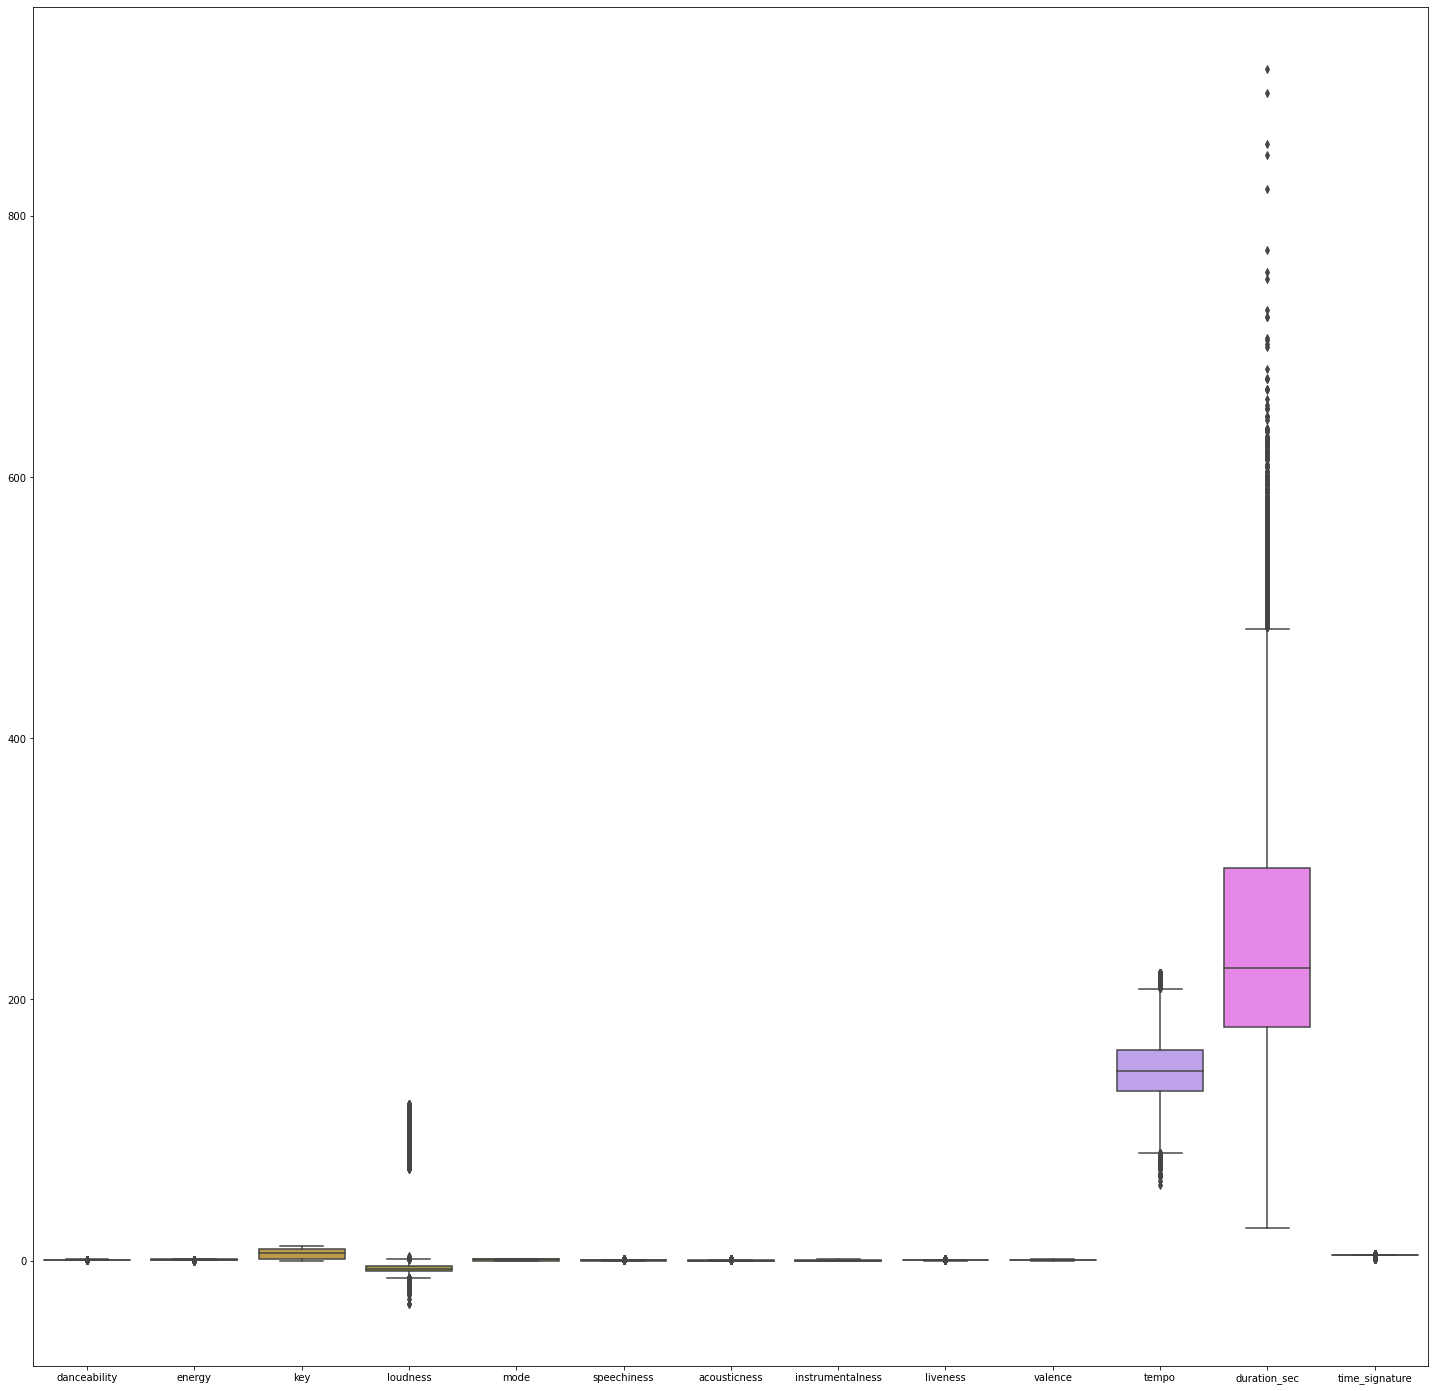

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_columns = df.select_dtypes(exclude='object').columns
plt.figure(figsize=(25,25))
sns.boxplot(data=df)
plt.show()  